In [23]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [24]:
df = pd.read_csv('C:/Users/DELL/Downloads/african_crises.csv', index_col='case')

In [25]:
df["banking_crisis_new"]=df.banking_crisis.replace({'crisis':1,'no_crisis':0})
df=df.drop(columns='banking_crisis',axis=0)
df.head(1)

,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
case,,,,,,,,,,,,,
1,DZA,Algeria,1870,1,0.052,0,0,0.000,3.441,0,0,0,1


In [26]:
print("Checking the columns in the dataset.")
df.columns
df.info()

Checking the columns in the dataset.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 1 to 70
Data columns (total 13 columns):
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis_new                 1059 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 115.8+ KB


In [27]:
df.shape

(1059, 13)

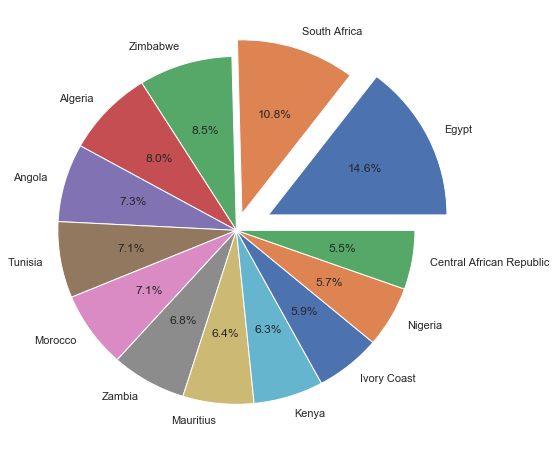

In [28]:
plt.figure(figsize=(8,8))
counts= df['country'].value_counts()
country=counts.index
explode = (0.2, 0.1, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0)
plt.pie(counts, explode=explode,labels=country,autopct='%1.1f%%')
plt.show()

In [29]:
df.shape
df.cc3.value_counts()

EGY    155
ZAF    114
ZWE     90
DZA     85
AGO     77
MAR     75
TUN     75
ZMB     72
MUS     68
KEN     67
CIV     63
NGA     60
CAF     58
Name: cc3, dtype: int64

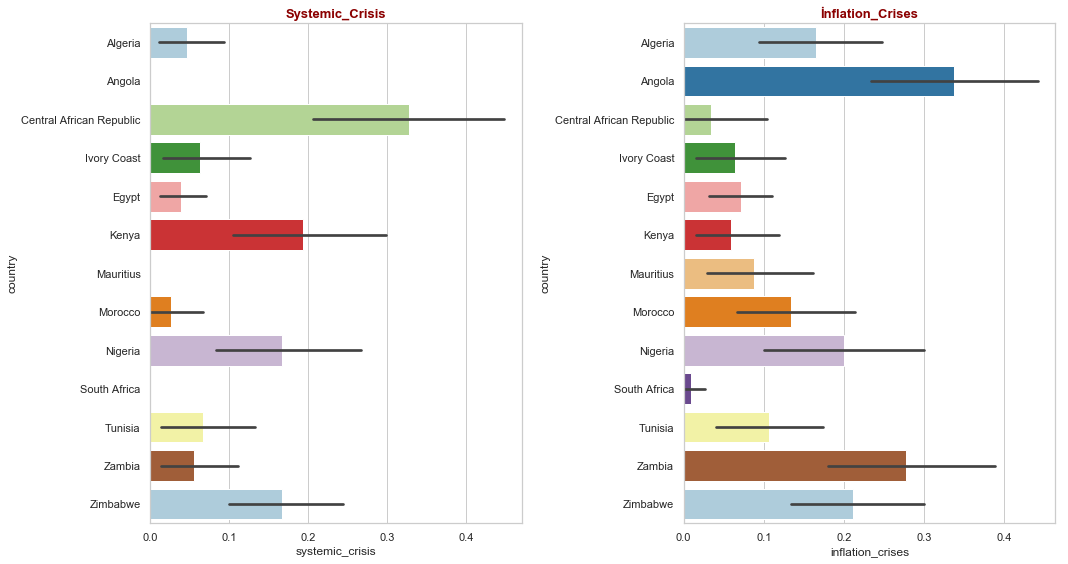

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.barplot(x='systemic_crisis',y='country',data=df, palette='Paired')
#plt.ylabel(None)
plt.title("Systemic_Crisis", fontdict=baslik_font)
plt.subplot(122)
plt.title("İnflation_Crises", fontdict=baslik_font)
sns.barplot(y='country',x='inflation_crises',data=df,palette='Paired')
#plt.ylabel(None)
plt.tight_layout()
plt.show()

(0, 15)

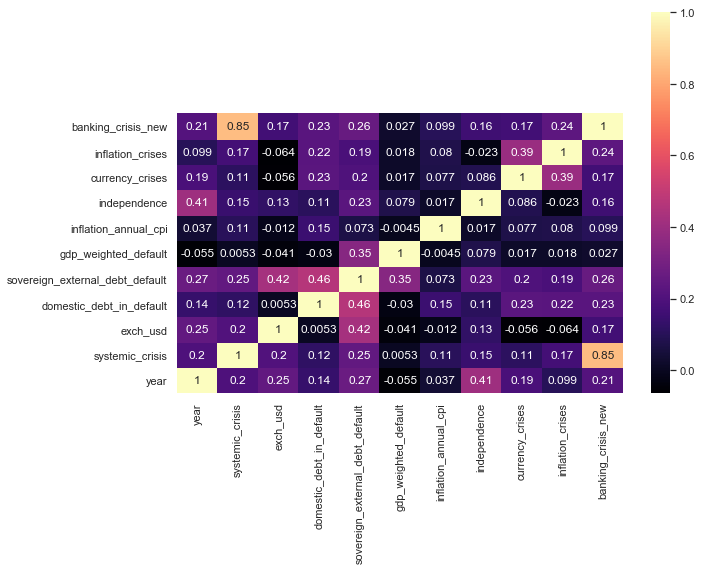

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='magma', annot=True)
plt.ylim(0,15)

In [32]:
Tn = df[(df.cc3=='TUN')& (df.year>=1965)]
Tn.head()


,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
case,,,,,,,,,,,,,
63,TUN,Tunisia,1965,0,0.520,0,0,0.000,5.550,1,1,0,0
63,TUN,Tunisia,1966,0,0.520,0,0,0.000,4.536,1,0,0,0
63,TUN,Tunisia,1967,0,0.520,0,0,0.000,2.844,1,0,0,0
63,TUN,Tunisia,1968,0,0.520,0,0,0.000,2.499,1,0,0,0
63,TUN,Tunisia,1969,0,0.520,0,0,0.000,2.805,1,0,0,0


In [33]:
Tn.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis_new
count,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,1989.500,0.100,0.916,0.000,0.080,0.005,5.253,1.000,0.080,0.000,0.100
std,14.577,0.303,0.399,0.000,0.274,0.016,2.593,0.000,0.274,0.000,0.303
min,1965.000,0.000,0.387,0.000,0.000,0.000,1.444,1.000,0.000,0.000,0.000
25%,1977.250,0.000,0.520,0.000,0.000,0.000,3.329,1.000,0.000,0.000,0.000
50%,1989.500,0.000,0.883,0.000,0.000,0.000,4.658,1.000,0.000,0.000,0.000
75%,2001.750,0.000,1.245,0.000,0.000,0.000,6.993,1.000,0.000,0.000,0.000
max,2014.000,1.000,1.862,0.000,1.000,0.060,13.673,1.000,1.000,0.000,1.000


In [34]:
Tn.inflation_annual_cpi.value_counts()

8.224     1
4.536     1
7.693     1
3.293     1
7.722     1
4.630     1
10.057    1
8.903     1
2.844     1
6.502     1
13.673    1
2.706     1
4.686     1
1.444     1
5.518     1
1.563     1
3.438     1
5.785     1
3.599     1
5.805     1
4.924     1
2.716     1
3.530     1
8.557     1
10.011    1
4.913     1
3.102     1
3.621     1
8.195     1
2.724     1
6.159     1
5.550     1
2.499     1
5.423     1
8.596     1
4.253     1
3.541     1
6.232     1
4.143     1
2.770     1
7.156     1
4.409     1
3.733     1
5.139     1
8.972     1
4.040     1
7.551     1
2.768     1
1.987     1
2.805     1
Name: inflation_annual_cpi, dtype: int64

In [35]:
Tn.exch_usd.value_counts()

0.520    6
0.999    1
0.471    1
1.468    1
0.387    1
0.475    1
1.252    1
1.317    1
1.199    1
0.419    1
0.480    1
0.837    1
0.951    1
0.727    1
0.840    1
0.427    1
0.867    1
1.297    1
1.334    1
0.516    1
1.438    1
1.551    1
0.905    1
0.898    1
1.101    1
0.865    1
0.951    1
1.363    1
0.778    1
1.208    1
0.991    1
0.616    1
1.147    1
0.405    1
0.757    1
0.425    1
1.310    1
1.862    1
1.047    1
1.385    1
1.221    1
1.653    1
0.460    1
0.559    1
1.499    1
Name: exch_usd, dtype: int64

-48.54020914010207 [ 0.02492435 -0.01700277 -0.0240905  -0.01615742  0.         -0.01700277] 0.011939500611371818


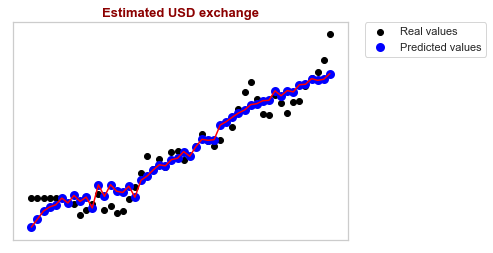

In [36]:
Y = Tn['exch_usd']


X = Tn[[ 'year', 'systemic_crisis','inflation_annual_cpi', 'currency_crises', 'inflation_crises',
       'banking_crisis_new']]

lrm_1 = linear_model.LinearRegression()

lrm_1.fit(X, Y)
expected = Y
predicted = lrm_1.predict(X)
mse = np.mean((predicted-expected)**2) # Mean square error 
 
print (lrm_1.intercept_, lrm_1.coef_, mse)  # y=ax + b  a = coef et b = intercept
# Plot outputs
plt.scatter(range(0,X.shape[0]), Y.values,  color='black',label='Real values')
plt.scatter(range(0,X.shape[0]), predicted, color='blue', linewidth=3,label='Predicted values')
plt.plot(range(0,X.shape[0]),predicted,color='red')
plt.xticks(())
plt.yticks(())



plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Estimated USD exchange", fontdict=baslik_font)
plt.show()


In [17]:
X_t = sm.add_constant(X)

sonuclar = sm.OLS(Y, X_t).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exch_usd   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     135.4
Date:                Sat, 30 May 2020   Prob (F-statistic):           1.76e-24
Time:                        07:27:55   Log-Likelihood:                 39.751
No. Observations:                  50   AIC:                            -69.50
Df Residuals:                      45   BIC:                            -59.94
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -48.5402      2.423    -20.029      0.000     -53.421     -43.659
year                     0.0249      0.001     20.542      0.000       0.022       0.027
systemic_crisis         -0.0170      0.027     -0.620      0.538      -0.072       0.038
inflation_annual_cpi    -0.0241      0.007     -3.677      0.001      -0.037      -0.011
currency_crises         -0.0162      0.063     -0.257      0.798      -0.143       0.110
inflation_crises              0          0        nan        nan           0           0
banking_crisis_new      -0.0170      0.027     -0.620      0.538      -0.072       0.038
==============================================================================
Omnibus:                        3.766   Durbin-Watson:                   0.583
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                2.960
Skew:                           0.587   Prob(JB):                        0.228
Kurtosis:                       3.208   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

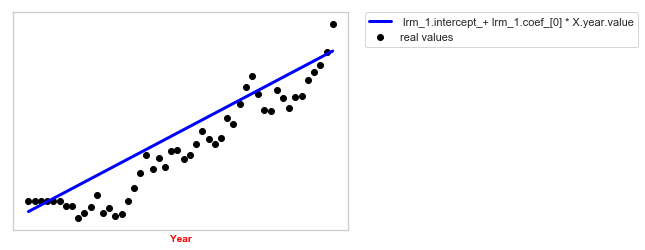

In [18]:
# Plot outputs
plt.scatter(X.year.values, Y.values,  color='black',label='real values')
plt.plot(X.year.values, lrm_1.intercept_+ lrm_1.coef_[0] * X.year.values, color='blue', linewidth=3,label=' lrm_1.intercept_+ lrm_1.coef_[0] * X.year.value')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


plt.xticks(())
plt.yticks(())
plt.xlabel("Year", fontdict=eksen_font,color='red')



plt.show()